In [47]:
from datetime import date
print("Today's date:", date.today())

Today's date: 2025-06-30


# Heatwave Forecast Visualization

**Author:** Michail Giannopoulos    

**Date:** 2025-06-17  

**Purpose:** This notebook visualizes daily maximum temperature forecasts, identifies heatwave days (≥30°C), and highlights them for clearer communication and analysis.

**City:** Rome  
**Data Source:** Open-Meteo ECMWF (IFS 0.25° resolution)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [49]:
city_name = "athens"
forecast_file = Path(f"data/raw/{city_name}_forecast.csv")
df = pd.read_csv(forecast_file)

In [50]:
def detect_heatwaves(df: pd.DataFrame, threshold: float = 30.0) -> pd.DataFrame:
    df["is_hot"] = df["temperature"] >= threshold
    return df

df = detect_heatwaves(df)

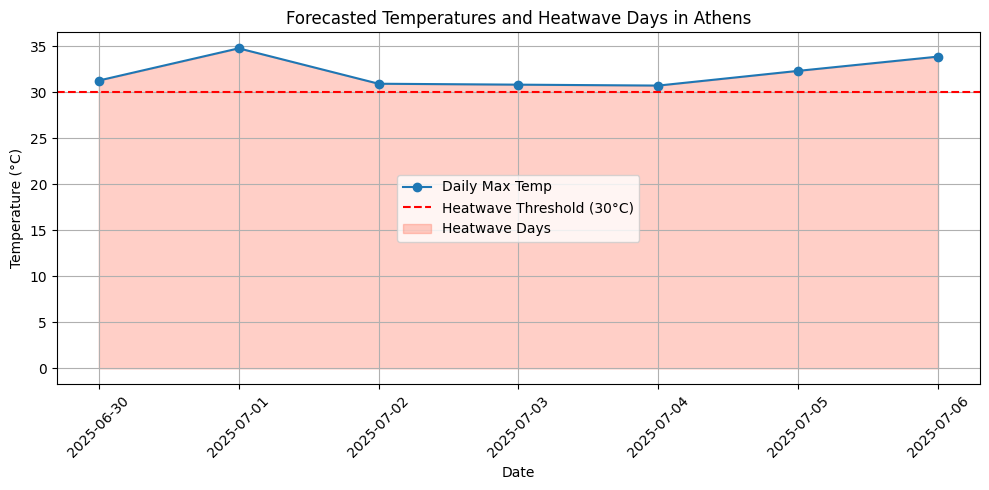

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["temperature"], label="Daily Max Temp", marker="o")
plt.axhline(30, color="red", linestyle="--", label="Heatwave Threshold (30°C)")
plt.fill_between(df["date"], df["temperature"],
                 where=df["is_hot"],
                 color="tomato", alpha=0.3,
                 label="Heatwave Days")

plt.title(f"Forecasted Temperatures and Heatwave Days in {city_name.title()}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig(f"outputs/heatwave_forecast_{city_name}.png", dpi=300)
plt.show()